## 1. Data Overview & Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df = pd.read_csv("../data/data.csv")


In [4]:
df.head()

,Unnamed: 0,Year,GDP_Current_USD,GDP_Growth_Percent,GDP_Per_Capita_USD,Inflation_Rate_Percent,Official_Exchange_Rate,Population_Total,Population_Growth_Percent,Exports_USD,Imports_USD,Trade_Percent_GDP,Industry_Value_Added_Percent_GDP
0,0,1960,4.199134e+09,NaN,195.577527,9.822411,75.75,21470434,NaN,5.815414e+08,7.301649e+08,31.237542,25.747575
1,1,1961,4.426949e+09,10.390918,200.081529,3.162564,75.75,22125726,3.006418,6.079152e+08,7.022512e+08,29.595244,27.828215
2,2,1962,4.693566e+09,7.909268,205.786810,0.721321,75.75,22807907,3.036627,6.804430e+08,6.420163e+08,28.176000,29.544960
3,3,1963,4.928628e+09,7.042075,209.559376,0.371850,75.75,23519005,3.070154,7.556082e+08,6.141025e+08,27.790913,30.862952
4,4,1964,5.379846e+09,8.475228,221.731728,3.814490,75.75,24262859,3.113793,8.822023e+08,8.785486e+08,32.728650,31.402056


In [5]:
df.isna().sum()



Unnamed: 0                          0
Year                                0
GDP_Current_USD                     0
GDP_Growth_Percent                  1
GDP_Per_Capita_USD                  0
Inflation_Rate_Percent              0
Official_Exchange_Rate              1
Population_Total                    0
Population_Growth_Percent           1
Exports_USD                         0
Imports_USD                         0
Trade_Percent_GDP                   0
Industry_Value_Added_Percent_GDP    0
dtype: int64

In [6]:
df.dtypes


Unnamed: 0                            int64
Year                                  int64
GDP_Current_USD                     float64
GDP_Growth_Percent                  float64
GDP_Per_Capita_USD                  float64
Inflation_Rate_Percent              float64
Official_Exchange_Rate              float64
Population_Total                      int64
Population_Growth_Percent           float64
Exports_USD                         float64
Imports_USD                         float64
Trade_Percent_GDP                   float64
Industry_Value_Added_Percent_GDP    float64
dtype: object

In [7]:
df["Year"].diff().value_counts()

Year
1.0    64
Name: count, dtype: int64

<Axes: >

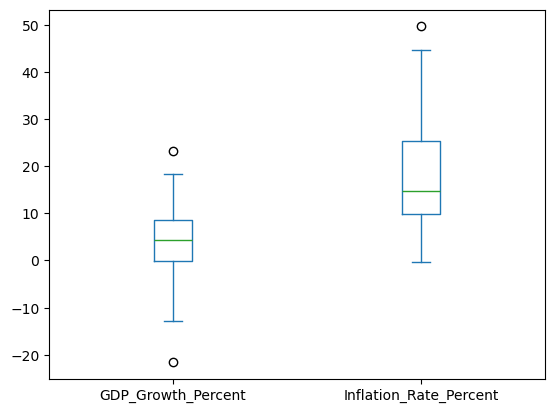

In [8]:
df.describe()
df[["GDP_Growth_Percent", "Inflation_Rate_Percent"]].plot(kind="box")


In [9]:
df.sort_values("GDP_Growth_Percent").head(5)[
    ["Year", "GDP_Growth_Percent", "Inflation_Rate_Percent", "Official_Exchange_Rate"]
]


,Year,GDP_Growth_Percent,Inflation_Rate_Percent,Official_Exchange_Rate
20,1980,-21.599649,20.643914,70.631848
18,1978,-12.840857,11.721969,70.492031
19,1979,-12.020760,10.487237,70.492031
26,1986,-9.784906,18.429003,78.778783
24,1984,-7.139850,12.540219,90.051440


In [10]:
df.sort_values("Inflation_Rate_Percent", ascending=False).head(5)[
    ["Year", "Inflation_Rate_Percent", "GDP_Growth_Percent", "Official_Exchange_Rate"]
]


,Year,Inflation_Rate_Percent,GDP_Growth_Percent,Official_Exchange_Rate
35,1995,49.655986,2.401045,1748.350246
63,2023,44.579186,5.332351,42000.000000
62,2022,43.488464,4.352811,42000.000000
61,2021,43.389016,4.130897,42000.000000
59,2019,39.907346,-2.361435,42000.000000


2. Visualizing Shock Years on Time Series

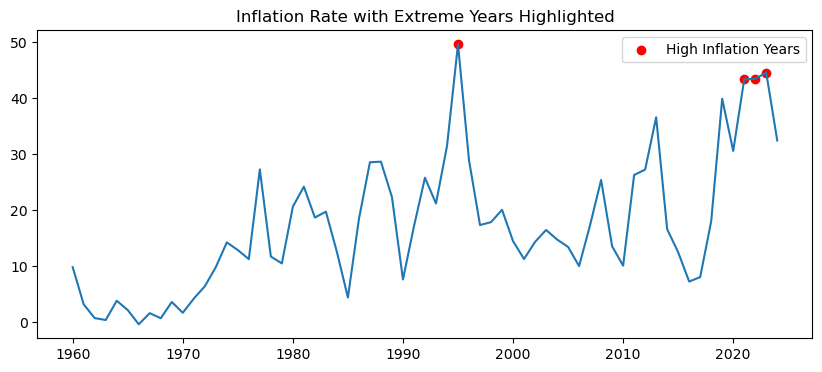

In [11]:
high_inflation = df["Inflation_Rate_Percent"] > df["Inflation_Rate_Percent"].quantile(0.95)

plt.figure(figsize=(10,4))
plt.plot(df["Year"], df["Inflation_Rate_Percent"])
plt.scatter(
    df.loc[high_inflation, "Year"],
    df.loc[high_inflation, "Inflation_Rate_Percent"],
    color="red",
    label="High Inflation Years"
)
plt.legend()
plt.title("Inflation Rate with Extreme Years Highlighted")
plt.show()


The figure shows Iran’s annual inflation rate from 1960 to 2024, with extreme inflation years highlighted using a 95th percentile threshold. Inflation exhibits significant volatility across the entire period, with several pronounced spikes rather than a stable long-term trend.

The highlighted extreme years are not randomly distributed but cluster in specific periods, indicating episodes of severe macroeconomic stress. These spikes suggest periods of currency instability, supply shocks, or structural economic disruptions rather than measurement errors.

The presence of recurring inflation shocks in later years also indicates increasing inflationary pressure over time, reinforcing the importance of considering regime shifts when modeling inflation dynamics.


In [12]:
df["Decade"] = (df["Year"] // 10) * 10


In [13]:
df.head()

,Unnamed: 0,Year,GDP_Current_USD,GDP_Growth_Percent,GDP_Per_Capita_USD,Inflation_Rate_Percent,Official_Exchange_Rate,Population_Total,Population_Growth_Percent,Exports_USD,Imports_USD,Trade_Percent_GDP,Industry_Value_Added_Percent_GDP,Decade
0,0,1960,4.199134e+09,NaN,195.577527,9.822411,75.75,21470434,NaN,5.815414e+08,7.301649e+08,31.237542,25.747575,1960
1,1,1961,4.426949e+09,10.390918,200.081529,3.162564,75.75,22125726,3.006418,6.079152e+08,7.022512e+08,29.595244,27.828215,1960
2,2,1962,4.693566e+09,7.909268,205.786810,0.721321,75.75,22807907,3.036627,6.804430e+08,6.420163e+08,28.176000,29.544960,1960
3,3,1963,4.928628e+09,7.042075,209.559376,0.371850,75.75,23519005,3.070154,7.556082e+08,6.141025e+08,27.790913,30.862952,1960
4,4,1964,5.379846e+09,8.475228,221.731728,3.814490,75.75,24262859,3.113793,8.822023e+08,8.785486e+08,32.728650,31.402056,1960


In [15]:
df["Trade_Balance"] = df["Exports_USD"] - df["Imports_USD"]


In [16]:
df.head()

,Unnamed: 0,Year,GDP_Current_USD,GDP_Growth_Percent,GDP_Per_Capita_USD,Inflation_Rate_Percent,Official_Exchange_Rate,Population_Total,Population_Growth_Percent,Exports_USD,Imports_USD,Trade_Percent_GDP,Industry_Value_Added_Percent_GDP,Decade,Trade_Balance
0,0,1960,4.199134e+09,NaN,195.577527,9.822411,75.75,21470434,NaN,5.815414e+08,7.301649e+08,31.237542,25.747575,1960,-1.486235e+08
1,1,1961,4.426949e+09,10.390918,200.081529,3.162564,75.75,22125726,3.006418,6.079152e+08,7.022512e+08,29.595244,27.828215,1960,-9.433601e+07
2,2,1962,4.693566e+09,7.909268,205.786810,0.721321,75.75,22807907,3.036627,6.804430e+08,6.420163e+08,28.176000,29.544960,1960,3.842676e+07
3,3,1963,4.928628e+09,7.042075,209.559376,0.371850,75.75,23519005,3.070154,7.556082e+08,6.141025e+08,27.790913,30.862952,1960,1.415057e+08
4,4,1964,5.379846e+09,8.475228,221.731728,3.814490,75.75,24262859,3.113793,8.822023e+08,8.785486e+08,32.728650,31.402056,1960,3.653727e+06


PREPROCESSING STEP 2 Handling Scale

In [17]:
df[[
    "GDP_Current_USD",
    "GDP_Per_Capita_USD",
    "Official_Exchange_Rate",
    "Population_Total"
]].describe()


,GDP_Current_USD,GDP_Per_Capita_USD,Official_Exchange_Rate,Population_Total
count,6.500000e+01,65.000000,64.000000,6.500000e+01
mean,1.893721e+11,2731.682117,7962.509546,5.648885e+07
std,1.780850e+11,2026.967104,13430.579461,2.209687e+07
min,4.199134e+09,195.577527,65.567841,2.147043e+07
25%,6.374362e+10,1408.965719,75.750000,3.483727e+07
50%,1.230579e+11,2208.996366,90.562513,6.118498e+07
75%,3.479884e+11,4064.346673,9317.995936,7.551420e+07
max,6.440193e+11,8114.080998,42000.000000,9.156774e+07


3. PREPROCESSING STEP 3 — Creating Modeling Subsets

In [18]:
macro_features = [
    "Inflation_Rate_Percent",
    "GDP_Growth_Percent",
    "Official_Exchange_Rate",
    "Trade_Percent_GDP",
    "Population_Growth_Percent"
]


In [19]:
structural_features = [
    "Industry_Value_Added_Percent_GDP",
    "Trade_Balance"
]


In [20]:
df.head()

,Unnamed: 0,Year,GDP_Current_USD,GDP_Growth_Percent,GDP_Per_Capita_USD,Inflation_Rate_Percent,Official_Exchange_Rate,Population_Total,Population_Growth_Percent,Exports_USD,Imports_USD,Trade_Percent_GDP,Industry_Value_Added_Percent_GDP,Decade,Trade_Balance
0,0,1960,4.199134e+09,NaN,195.577527,9.822411,75.75,21470434,NaN,5.815414e+08,7.301649e+08,31.237542,25.747575,1960,-1.486235e+08
1,1,1961,4.426949e+09,10.390918,200.081529,3.162564,75.75,22125726,3.006418,6.079152e+08,7.022512e+08,29.595244,27.828215,1960,-9.433601e+07
2,2,1962,4.693566e+09,7.909268,205.786810,0.721321,75.75,22807907,3.036627,6.804430e+08,6.420163e+08,28.176000,29.544960,1960,3.842676e+07
3,3,1963,4.928628e+09,7.042075,209.559376,0.371850,75.75,23519005,3.070154,7.556082e+08,6.141025e+08,27.790913,30.862952,1960,1.415057e+08
4,4,1964,5.379846e+09,8.475228,221.731728,3.814490,75.75,24262859,3.113793,8.822023e+08,8.785486e+08,32.728650,31.402056,1960,3.653727e+06
